As artificial intelligence (AI) becomes more prevalent in our daily lives, there is growing concern about the explainability and interpretability of AI models. These concerns have led to the development of the field of Explainable AI (XAI). XAI is focused on developing methods and techniques to make AI models more transparent and explainable.

One popular tool in the field of XAI is the ELI5 library. ELI5 is an open-source Python library that allows users to explain the predictions of machine learning models. In this tutorial, we will use the ELI5 library to explain the decisions made by a machine learning model on a real-world dataset.


[![Open In Colab](../images/badges/colab.svg)](https://colab.research.google.com/github/izikeros/blog/blob/master/content/posts/notebooks/2023-01-20-elif_tutorial.ipynb)&nbsp;[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/izikeros/blog/master?labpath=content%2Fposts%2Fnotebooks%2F2023-01-20-elif_tutorial.ipynb)

## Dataset

For this tutorial, we will be using the well-known Titanic dataset. The dataset contains information about passengers on the Titanic, including their age, sex, ticket class, and survival status. The goal is to predict whether a passenger survived the Titanic disaster or not.

We will start by loading the dataset into a Pandas DataFrame:

In [1]:
# Supress Warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv(
    "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
)

## Quick Exploratory Data Analysis (EDA)

Before we start building our machine learning model, let's perform some exploratory data analysis (EDA) to get a better understanding of the dataset.

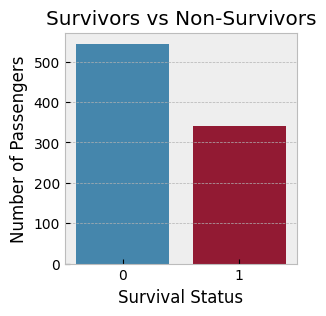

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.subplots(figsize=(3, 3))

# Bar plot of the number of survivors vs non-survivors
sns.countplot(x="Survived", data=df)
plt.title("Survivors vs Non-Survivors")
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.show()

**Figure 1**: Bar plot of the number of survivors vs non-survivors

From the above plot, we can see that more passengers did not survive the Titanic disaster than those who did.

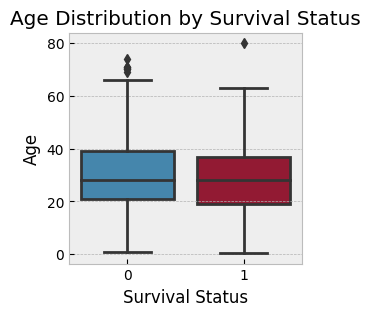

In [4]:
# Box plot of age by survival status
plt.subplots(figsize=(3, 3))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.show()

**Figure 2**: Bar plot of survival by age

The above plot shows that the median age of survivors is slightly lower than that of non-survivors.

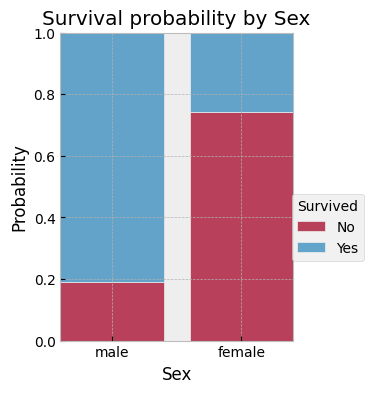

In [5]:
plt.subplots(figsize=(3, 4))
_ = sns.histplot(
    df,
    x="Sex",
    hue="Survived",
    stat="probability",
    multiple="fill",
    shrink=0.8,
    hue_order=[0, 1],
)

plt.title('Survival probability by Sex')
# set the legend
plt.legend(title="Survived", loc="upper right", labels=["No", "Yes"])

# set the legend outside the plot on the right side
plt.legend(title='Survived', loc='upper center', 
                    bbox_to_anchor=(1.15, 0.5), ncol=1, 
                    labels=['No', 'Yes'])

# show the plot
plt.show()

**Figure 3**: Survival probability by Sex

The above plot shows that a higher proportion of female passengers survived the Titanic disaster than male passengers.

## Feature Engineering

Next, we will perform some feature engineering to prepare our data for machine learning. We will start by dropping the columns that we do not need.

In [6]:
# Drop columns that we do not need
df = df.drop(["Name", "Fare", "Pclass"], axis=1)

We will then convert the categorical variables into numerical variables.

In [7]:
# Convert categorical variables into numerical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

We will also fill in missing values in the dataset.

In [8]:
# Fill in missing values for age and embarked
df["Age"] = df["Age"].fillna(df["Age"].median())

Finally, we will create a new feature called "FamilySize" by combining the "SibSp" and "Parch" columns.

In [9]:
# Create a new feature called "FamilySize"
df["FamilySize"] = df["Siblings/Spouses Aboard"] + df["Parents/Children Aboard"] + 1

## Machine Learning

Now that we have preprocessed our data, we can start building our machine learning model. We will be using a Random Forest Classifier from the Scikit-Learn library.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Survived", axis=1), df["Survived"], test_size=0.2, random_state=42
)

# Fit a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.764


We achieve an accuracy of around 76% on the testing set. This is a good starting point, but we need to understand how the model is making its decisions.
<!-- #endregion -->

## Explainable AI with ELI5

### Feature Importance

Feature importance is a popular XAI technique that helps us understand which features are most important in a machine learning model. ELI5 provides a simple way to compute feature importance using the `explain_weights` function.

Let's continue with the Titanic dataset example. To compute feature importance, we can fit a machine learning model to the data and then call the `explain_weights` function:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import eli5

# Fit a random forest classifier to the data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compute feature importance using ELI5
eli5.show_weights(rf, feature_names=list(X_train.columns))

This will output a table showing the feature importance scores for each feature:

This tells us that the most important feature in the model is `Age`, followed by `Sex`, `FamilySize`, and other. We can see that the model is heavily relying on the `Sex` feature, which is likely due to the "women and children first" policy that was followed during the Titanic disaster.

### Permutation Importance

Another XAI technique that can be used with ELI5 is permutation importance. 

> **Permutation importance** is similar to feature importance, but instead of fitting a new model for each feature, it randomly permutes each feature and measures the resulting decrease in model performance. This can help us identify features that are most important to the model's performance.

To compute permutation importance using ELI5, we can call the `permutation_importance` function:

In [12]:
from eli5.sklearn import PermutationImportance

# Compute permutation importance using ELI5
perm = PermutationImportance(rf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X_test.columns))

This output table is showing the permutation importance scores for each feature.

We can see that the permutation importance scores are somewhat similar to the feature importance scores, with `Sex` and `Age` being the most important features.

One advantage of permutation importance is that it can be used with any machine learning model, not just those that have a built-in feature importance method. However, it can be more computationally expensive than feature importance, especially for large datasets.

### Textual Explanation

ELI5 also provides tools for generating textual explanations for machine learning models. Textual explanations can help us understand how a model arrived at a particular decision or prediction.

To generate a textual explanation using ELI5, we can call the `explain_prediction` function. This function takes as input a trained model, a data instance, and a target class (if applicable), and outputs a textual explanation of the model's prediction.

Here is an example of using `explain_prediction` with a logistic regression model trained on the Titanic dataset:

In [13]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to the data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Generate a textual explanation using ELI5
eli5.show_prediction(lr, X_test.iloc[0], target_names=["died", "survived"])

This is output of a textual explanation of the model's prediction for the first test instance.


The textual explanation tells us that the model predicted a 12% probability of survival (`1 - 0.814 = 0.186`) for this passenger, and provides the weights of each feature used to make the prediction.

## Conclusion

In this tutorial, we explored some of the XAI techniques that can be used with ELI5, including feature importance, permutation importance, textual explanation, and visualizations. These tools can help us understand how machine learning models make decisions and build trust in these models. We applied these tools to a real-world dataset, the Titanic dataset, and discovered that `Sex` and `Age` were the most important features for predicting survival on the Titanic.

One limitation of ELI5 is that it may not be able to provide complete explanations for some models or datasets. In these cases, it may be necessary to use other XAI techniques, such as SHAP (SHapley Additive exPlanations), LIME (Local Interpretable Model-agnostic Explanations), or anchor explanations.

Another limitation is that XAI can be a time-consuming and computationally expensive process, especially for large datasets or complex models. However, the insights gained from XAI can be invaluable for improving the accuracy and trustworthiness of machine learning models.

In summary, ELI5 is a powerful library for XAI that provides a variety of tools for understanding and explaining the decisions made by machine learning models. By using these tools, we can gain valuable insights into how models work and build trust in these models.

## Further Reading

- [ELI5 documentation](https://eli5/)
- [Explaining XGBoost predictions on the Titanic dataset](https://eli5.readthedocs.io/en/latest/_notebooks/xgboost-titanic.html?highlight=%3Cbias%3E)

In [14]:
# Ensure this cell has remove_input tag added (to hide it in blog post text)
from IPython.core.display import HTML

def css_styling():
    styles = open("../../styles/notebook_custom_style.css", "r").read()
    return HTML(styles)

css_styling()